In [1]:
from __future__ import print_function, division

In [2]:
# Supress warnings
import warnings

warnings.simplefilter("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline
import seaborn as sns

### EDA Books

* [Exploratory Data Analysis](http://www.amazon.com/Exploratory-Data-Analysis-John-Tukey/dp/0201076160) by John Tukey

Other Authors on EDA:

* William Cleveland
* Edward Tufte

In [ ]:
# Let's do a histogram with defaults

(array([  5.,   1.,  12.,  13.,  15.,  23.,  10.,  12.,   4.,   5.]),
 array([-2.31524746, -1.84909989, -1.38295232, -0.91680475, -0.45065718,
         0.01549038,  0.48163795,  0.94778552,  1.41393309,  1.88008066,
         2.34622823]),
 <a list of 10 Patch objects>)

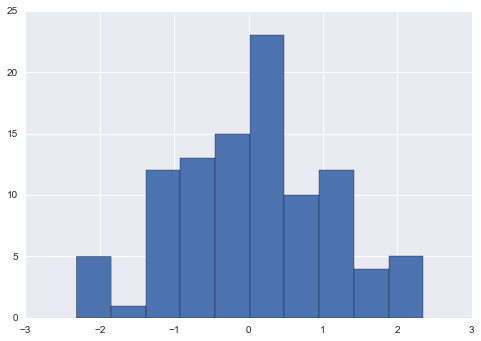

In [4]:
plt.hist(np.random.randn(100))

### Better Defaults

In [5]:
import seaborn as sns

(array([  4.,  11.,   8.,  15.,  25.,  11.,  11.,  10.,   3.,   2.]),
 array([-2.01650217, -1.56369119, -1.11088022, -0.65806925, -0.20525828,
         0.2475527 ,  0.70036367,  1.15317464,  1.60598561,  2.05879659,
         2.51160756]),
 <a list of 10 Patch objects>)

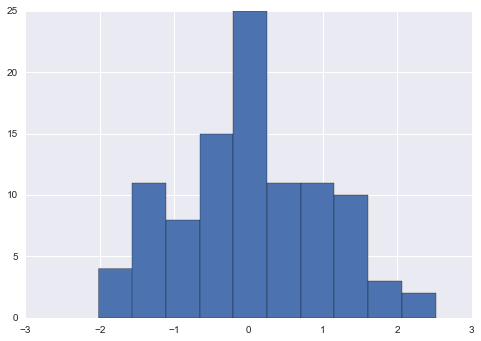

In [6]:
plt.hist(np.random.randn(100))  # this histogram uses different random numbers so it looks different

* What do you see different between the two plots?

## Seaborn

Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. 

Source: [Seaborn Docs](http://stanford.edu/~mwaskom/software/seaborn/)

Seaborn comes with some sample datasets that we will use to explore (https://github.com/mwaskom/seaborn-data)

In [7]:
titanic = sns.load_dataset("titanic")   # the famous titanic data set

In [8]:
# This is our familiar Pandas dataframe
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.2+ KB


In [9]:
# Remove all rows that have null Age
titanic = titanic[titanic.age.notnull()]

In [13]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Histogram (Distributions)

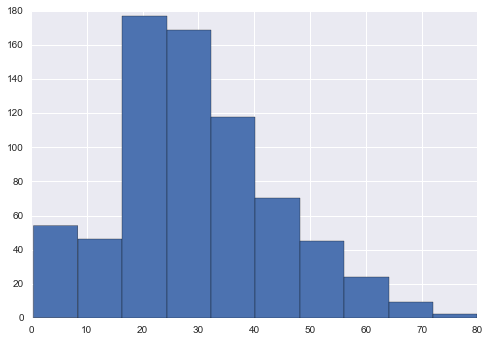

In [10]:
# We can plot distribution of Age by just using Pandas
# We don't need Seaborn for that
# Plot an histogram of age
titanic.age.hist()   # this is basically a pandas histogram

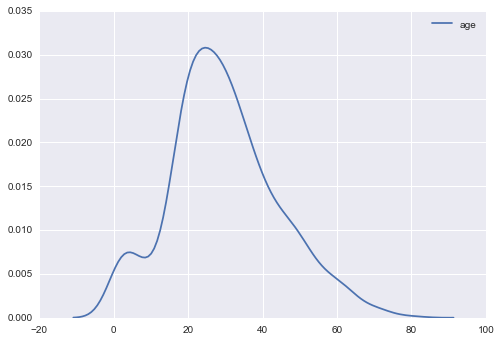

In [11]:
# But Seaborn adds some additional ways to look at distributions
sns.kdeplot(titanic.age)

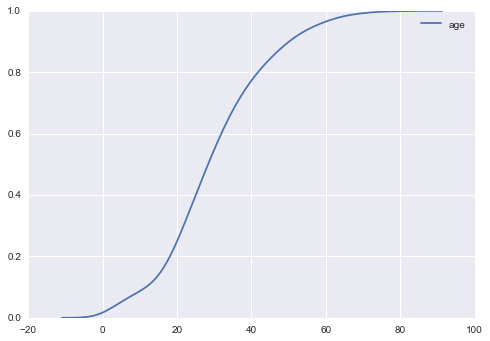

In [12]:
# Do a Cumulative Plot
sns.kdeplot(titanic.age, cumulative=True)  # gives us cumulative distribution of the values
# 80% of the people are under the age of 40 -- more clearly seen in this plot than with histogram

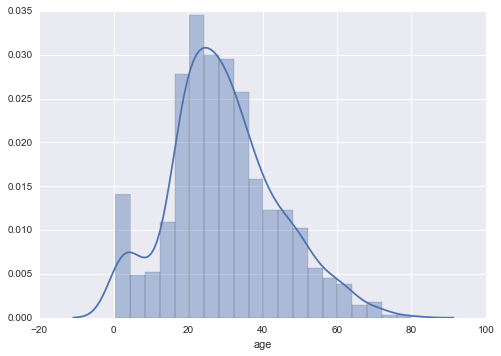

In [13]:
# Overlay Histogram and Dist Plot
sns.distplot(titanic.age)    # kernel density distribution that smooths the histogram

### Box Plots

{'boxes': [<matplotlib.lines.Line2D at 0x11cd26f10>],
 'caps': [<matplotlib.lines.Line2D at 0x11cd37e50>,
 'fliers': [<matplotlib.lines.Line2D at 0x11cd50090>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11cd42b10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11cd37150>,
  <matplotlib.lines.Line2D at 0x11cd37810>]}

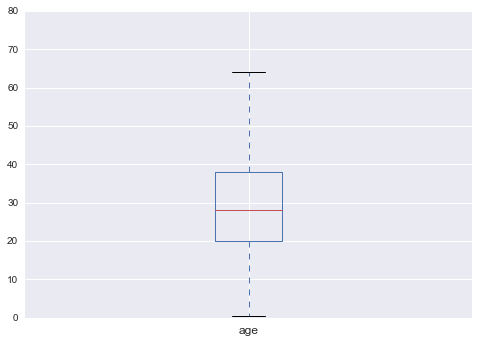

In [14]:
# Do a Boxplot of "age" with Pandas 
# Your code here
titanic.boxplot('age')

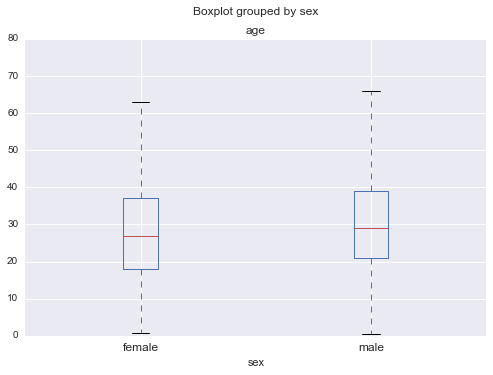

In [15]:
# Box plot "age" by "sex"
# Your code here
titanic.boxplot('age','sex')

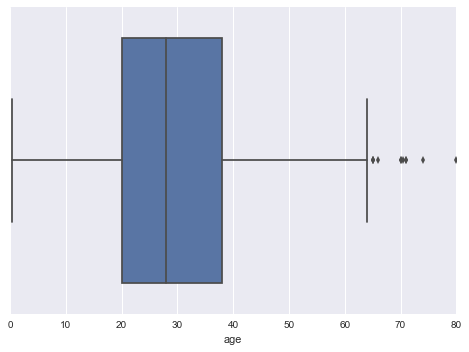

In [16]:
sns.boxplot(titanic.age)

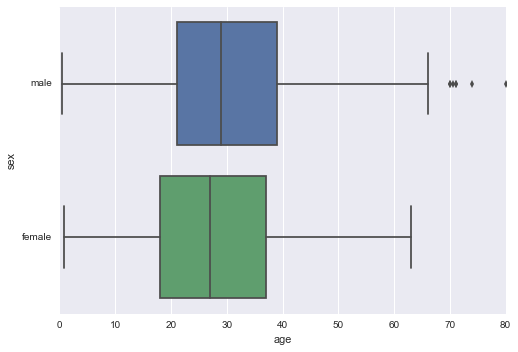

In [17]:
sns.boxplot(titanic.age, titanic.sex)

### Violin Plot

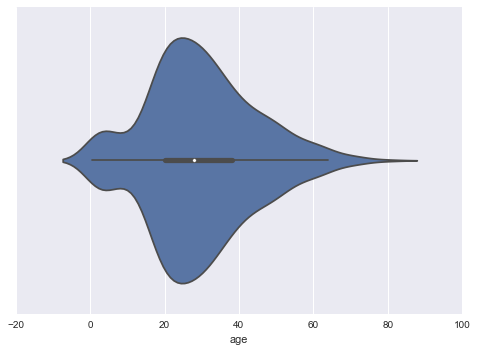

In [18]:
sns.violinplot(titanic.age)   # we can see the distributions of those plots

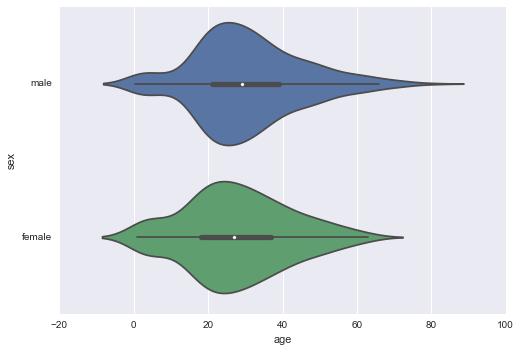

In [19]:
sns.violinplot(titanic.age, titanic.sex)   # longer tail for male is more obviously seen here

### Plot by Group

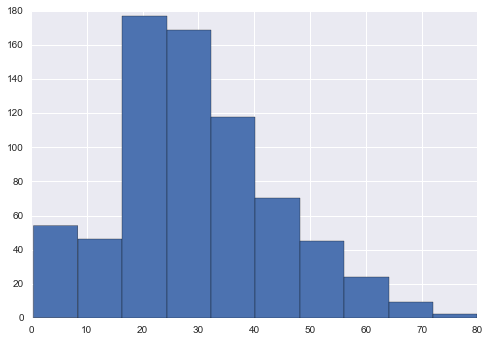

In [20]:
# Pandas Histogram of "age"
# Your code here
titanic.age.hist()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11d81af90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11de34c50>], dtype=object)

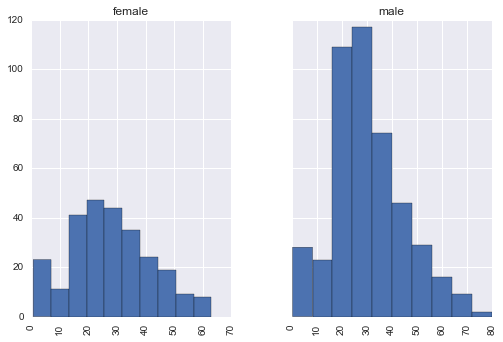

In [21]:
# Pandas histogram of "age" by "sex"
fig, ax=plt.subplots(1,2,sharey=True)   # need to correctly share the y axis here
titanic.age.hist(titanic.sex, ax=ax)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11fece7d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11fc22650>], dtype=object)

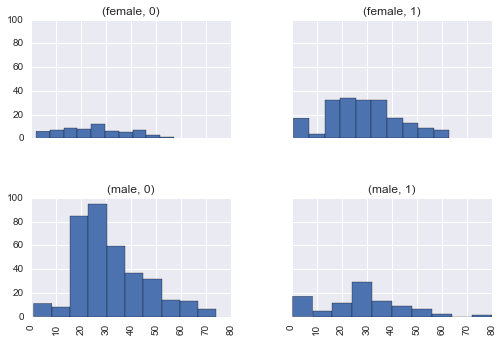

In [27]:
# Pandas histogram of "age" by "sex" and "survived"
fig, ax = plt.subplots(2,2,sharey=True,sharex=True)   # need to correctly share the y and x axis here
titanic.age.hist([titanic.sex, titanic.survived], ax=ax)
# need to figure out how can best do this

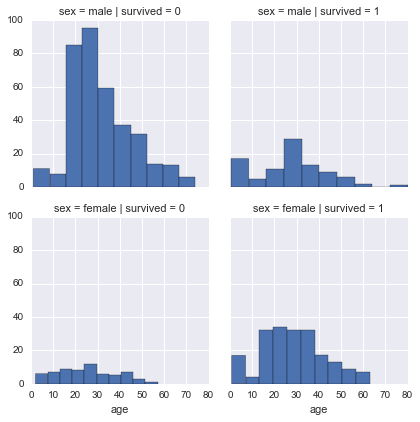

In [28]:
# Let's now look at Distribution of Age and Survived
# Now look at survived data
g = sns.FacetGrid(titanic, row='sex', col='survived', sharex=True, sharey=True)
# the data is split by these 2 groups
g.map(plt.hist, "age")
# This is all a convenience function on top of pandas

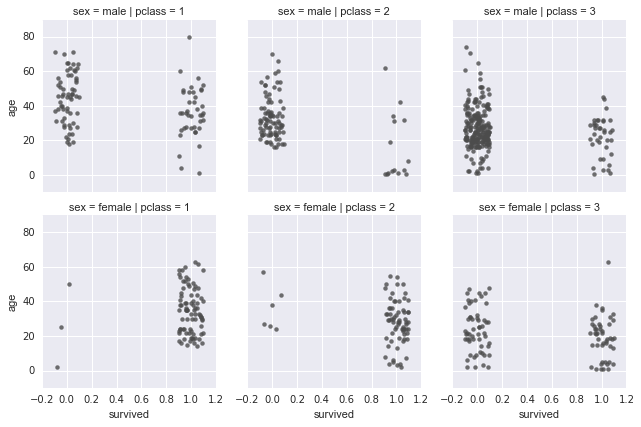

In [29]:
# Plot how many survived, by gender and class
grid_plot = sns.FacetGrid(titanic, row='sex', col='pclass')
grid_plot.map(sns.regplot, 'survived', 'age',color='.3', fit_reg=False, x_jitter=.1)

### Let's look at a IRIS Dataset

In [29]:
iris = sns.load_dataset("iris")

In [30]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Scatter Matrix

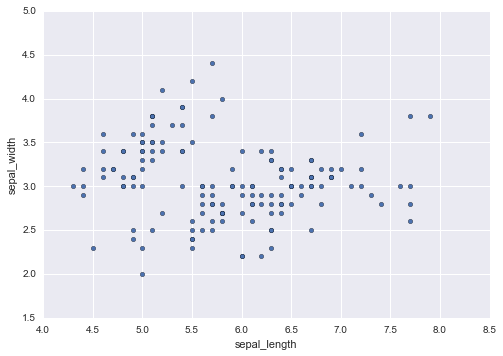

In [31]:
# Do a Scatter Plot with Pandas on two columns - "petal_length", "petal_width"
# fig, ax = plt.subplots(1,1, figsize = (10,5))   # we're creating a canvas here 
# iris.plot.scatter(
#       x = 'age',
#        y ='hours_per_week',
#       alpha = .25,
#        ax = ax
#        )
iris.plot.scatter("sepal_length","sepal_width")

In [ ]:
# Look at pair wise comparison (scatter matrix) between all numerical variables

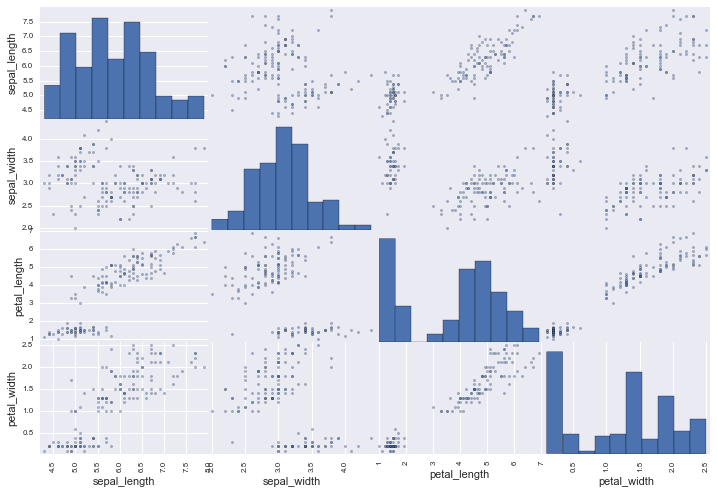

In [33]:
# Blow it up a little bit
pd.scatter_matrix(iris, figsize=(12,8));

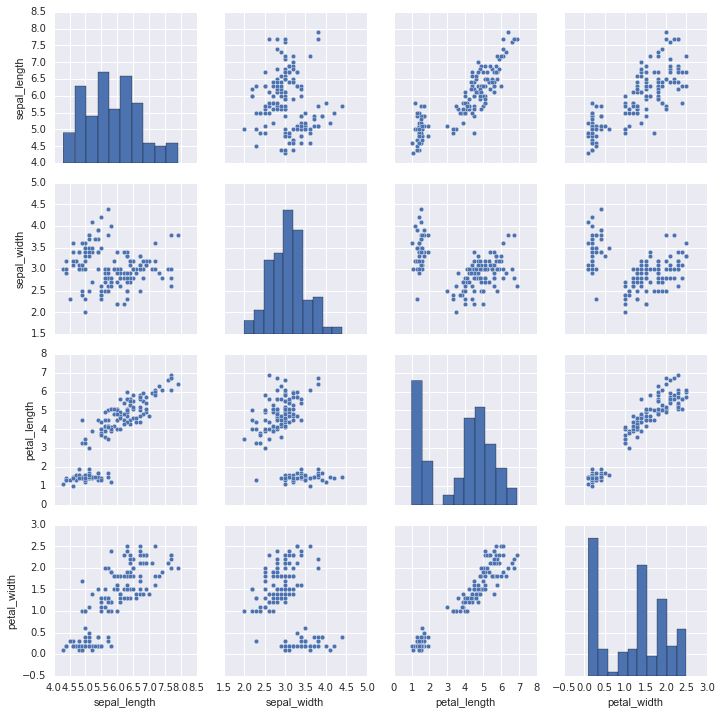

In [37]:
# Seaborn does this pair wise comparison Better
sns.pairplot(iris)

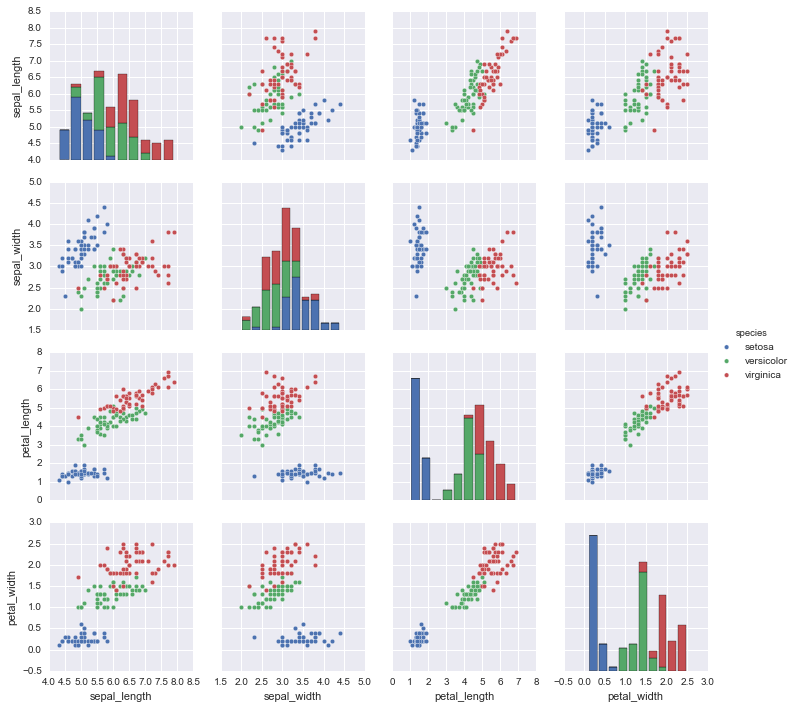

In [35]:
sns.pairplot(iris, hue="species")  # this kind of thing is not possible in the pandas scatter plot
# it's built on top of matplotlib and pandas

### Joint Plot

* Multiple plots at once

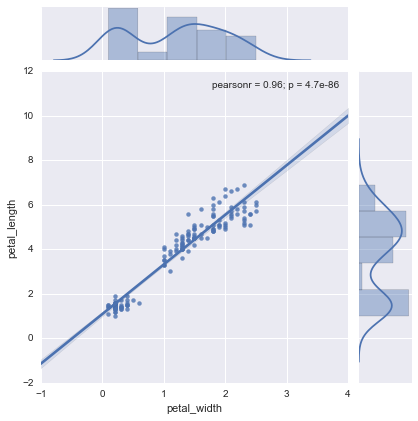

In [36]:
sns.jointplot("petal_width", "petal_length", kind="regplot", data=iris)  # gives us 2 variable distributions
# gives us joint distribution of these variables